In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from pykrx import stock
from datetime import datetime

In [2]:
# Data Load
import pandas as pd
per_kospi = pd.read_csv('./kospi_20211230.csv', encoding='cp949') # 코스피 종목 

kospi_df = stock.get_index_fundamental("20000101", "20220922", "1001") # 코스피

In [3]:
# Preprocessing

# kospi 슬라이싱
kospi_short = kospi_df[['종가']]
kospi_short = kospi_short.reset_index(drop=False)
kospi_short.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
kospi_short = kospi_short[kospi_short['Date'] >= '2021-12-30']


In [4]:
# 코스피 종목
per_kospi = per_kospi[['종목코드', '종목명', 'PER', 'PBR']]
per_kospi = per_kospi[per_kospi['PER'].notnull()]

# PER PBR에 따라 상하위 종목 나누기
lowper_kospi = per_kospi.sort_values(by=['PER', 'PBR']).head(15)
highper_kospi = per_kospi.sort_values(by=['PER', 'PBR'], ascending=False).head(15)
lowpbr_kospi = per_kospi.sort_values(by=['PBR', 'PER']).head(15)
highpbr_kospi = per_kospi.sort_values(by=['PBR', 'PER'], ascending=False).head(15)

In [5]:
# 상하위 종목 종가 데이터 가져오기
import time
import pandas as pd

df_lowper = pd.DataFrame()
df_highper = pd.DataFrame()
df_lowpbr = pd.DataFrame()
df_highpbr = pd.DataFrame()

for ticker in list(lowper_kospi['종목코드']):
    df = stock.get_market_ohlcv_by_date(fromdate="20211230", todate="20220922", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    df_lowper = pd.concat([df_lowper, df], axis=0)
    time.sleep(1)
df_lowper = df_lowper.reset_index()
df_lowper.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
df_lowper['Date'] = pd.to_datetime(df_lowper['Date'])

for ticker in list(highper_kospi['종목코드']):
    df = stock.get_market_ohlcv_by_date(fromdate="20211230", todate="20220922", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    df_highper = pd.concat([df_highper, df], axis=0)
    time.sleep(1)
df_highper = df_highper.reset_index()
df_highper.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
df_highper['Date'] = pd.to_datetime(df_highper['Date'])

for ticker in list(lowpbr_kospi['종목코드']):
    df = stock.get_market_ohlcv_by_date(fromdate="20211230", todate="20220922", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    df_lowpbr = pd.concat([df_lowpbr, df], axis=0)
    time.sleep(1)
df_lowpbr = df_lowpbr.reset_index()
df_lowpbr.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
df_lowpbr['Date'] = pd.to_datetime(df_lowpbr['Date'])

for ticker in list(highpbr_kospi['종목코드']):
    df = stock.get_market_ohlcv_by_date(fromdate="20211230", todate="20220922", ticker=ticker)
    df = df.assign(종목코드=ticker, 종목명=stock.get_market_ticker_name(ticker))
    df_highpbr = pd.concat([df_highpbr, df], axis=0)
    time.sleep(1)
df_highpbr = df_highpbr.reset_index()
df_highpbr.rename(columns={'날짜':'Date', '종가':'Close'}, inplace=True)
df_highpbr['Date'] = pd.to_datetime(df_highpbr['Date'])

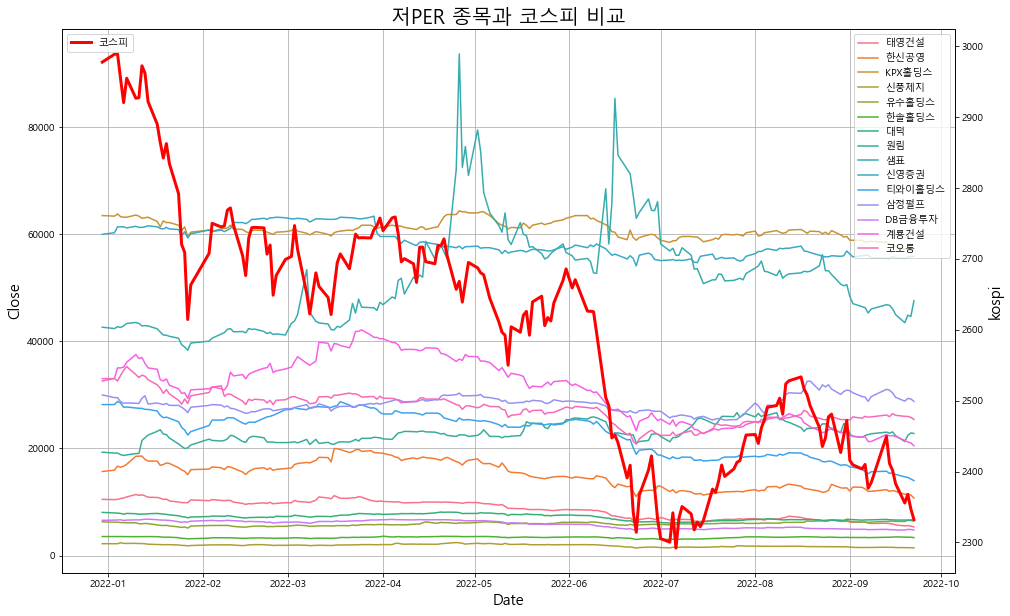

In [16]:
# Visualization
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=df_lowper,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'upper right')
plt.ylabel('Close', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

ax2 = ax1.twinx() # y축 공유
ax2 = sns.lineplot(
    data=kospi_short,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

plt.title('저PER 종목과 코스피 비교', fontsize=20)
plt.legend(loc = 'upper left')
plt.ylabel('kospi', fontsize=15)
plt.show()

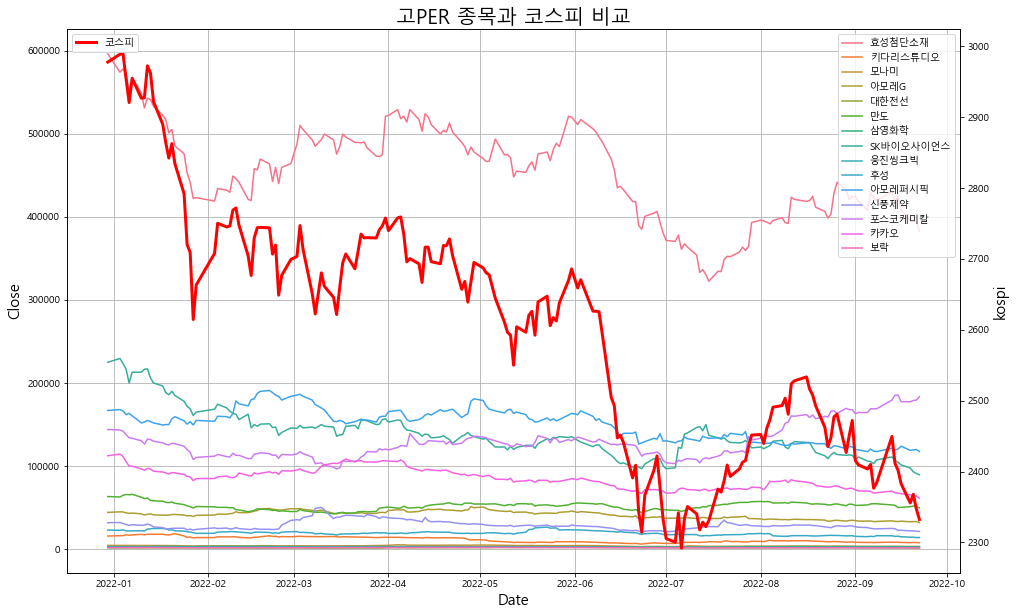

In [17]:
# Visualization
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=df_highper,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'upper right')
plt.ylabel('Close', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

ax2 = ax1.twinx() # y축 공유
ax2 = sns.lineplot(
    data=kospi_short,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

plt.title('고PER 종목과 코스피 비교', fontsize=20)
plt.legend(loc = 'upper left')
plt.ylabel('kospi', fontsize=15)
plt.show()

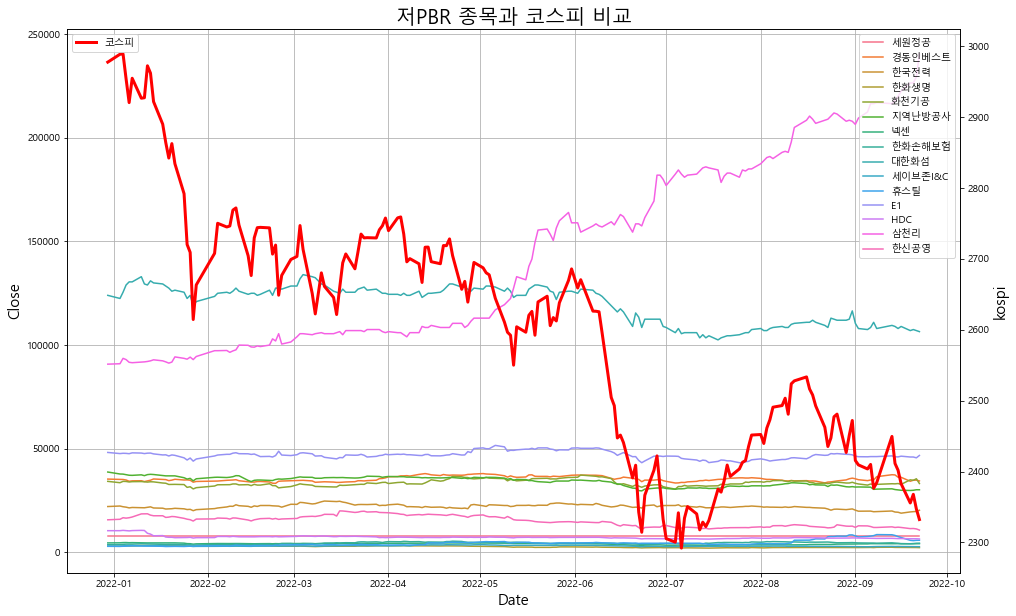

In [18]:
# Visualization
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=df_lowpbr,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'upper right')
plt.ylabel('Close', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

ax2 = ax1.twinx() # y축 공유
ax2 = sns.lineplot(
    data=kospi_short,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

plt.title('저PBR 종목과 코스피 비교', fontsize=20)
plt.legend(loc = 'upper left')
plt.ylabel('kospi', fontsize=15)
plt.show()

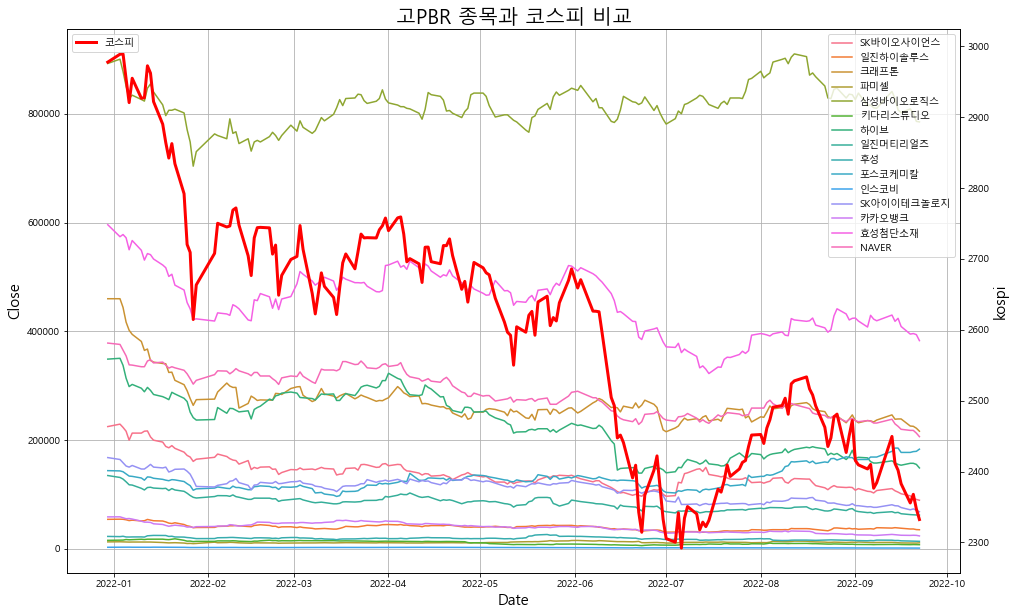

In [19]:
# Visualization
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=df_highpbr,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'upper right')
plt.ylabel('Close', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

ax2 = ax1.twinx() # y축 공유
ax2 = sns.lineplot(
    data=kospi_short,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

plt.title('고PBR 종목과 코스피 비교', fontsize=20)
plt.legend(loc = 'upper left')
plt.ylabel('kospi', fontsize=15)
plt.show()

In [10]:
# 코스피 보유수익률 계산
kospi_yeild = pd.DataFrame(kospi_short['Close']/kospi_short.iloc[0, 1])
# kospi_lessper_yeild = 
kospi_yeild = pd.concat([kospi_short[['Date']], kospi_yeild], axis=1)
kospi_yeild

,Date,Close
5431,2021-12-30,1.000000
5432,2022-01-03,1.003734
5433,2022-01-04,1.003892
5434,2022-01-05,0.992047
5435,2022-01-06,0.980817
...,...,...
5605,2022-09-16,0.800222
5606,2022-09-19,0.791114
5607,2022-09-20,0.795208
5608,2022-09-21,0.788276


In [11]:
# 종목별 보유수익률 계산
lowper_list = list(df_lowper['종목명'].unique())
highper_list = list(df_highper['종목명'].unique())
lowpbr_list = list(df_lowpbr['종목명'].unique())
highpbr_list = list(df_highpbr['종목명'].unique())

lowper_yeild = pd.DataFrame()
for name in lowper_list:
    temp = df_lowper[df_lowper['종목명'] == name][['Date', 'Close']]
    temp = pd.DataFrame(temp['Close']/temp.iloc[0, 1])
    temp = temp.assign(종목명=name, Date=df_lowper['Date'])
    lowper_yeild = pd.concat([lowper_yeild, temp], axis=0)

highper_yeild = pd.DataFrame()
for name in highper_list:
    temp = df_highper[df_highper['종목명'] == name][['Date', 'Close']]
    temp = pd.DataFrame(temp['Close']/temp.iloc[0, 1])
    temp = temp.assign(종목명=name, Date=df_highper['Date'])
    highper_yeild = pd.concat([highper_yeild, temp], axis=0)
    
lowpbr_yeild = pd.DataFrame()
for name in lowpbr_list:
    temp = df_lowpbr[df_lowpbr['종목명'] == name][['Date', 'Close']]
    temp = pd.DataFrame(temp['Close']/temp.iloc[0, 1])
    temp = temp.assign(종목명=name, Date=df_lowpbr['Date'])
    lowpbr_yeild = pd.concat([lowpbr_yeild, temp], axis=0)
    
highpbr_yeild = pd.DataFrame()
for name in highpbr_list:
    temp = df_highpbr[df_highpbr['종목명'] == name][['Date', 'Close']]
    temp = pd.DataFrame(temp['Close']/temp.iloc[0, 1])
    temp = temp.assign(종목명=name, Date=df_highpbr['Date'])
    highpbr_yeild = pd.concat([highpbr_yeild, temp], axis=0)

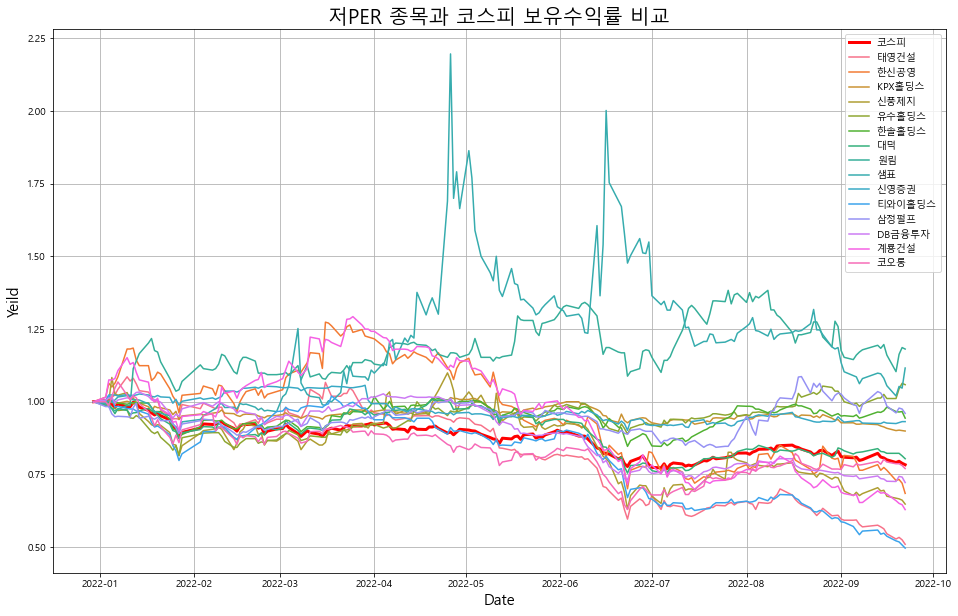

In [12]:
# Visualization
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=kospi_yeild,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=lowper_yeild,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'best')
plt.ylabel('Yeild', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('저PER 종목과 코스피 보유수익률 비교', fontsize=20)
plt.show()

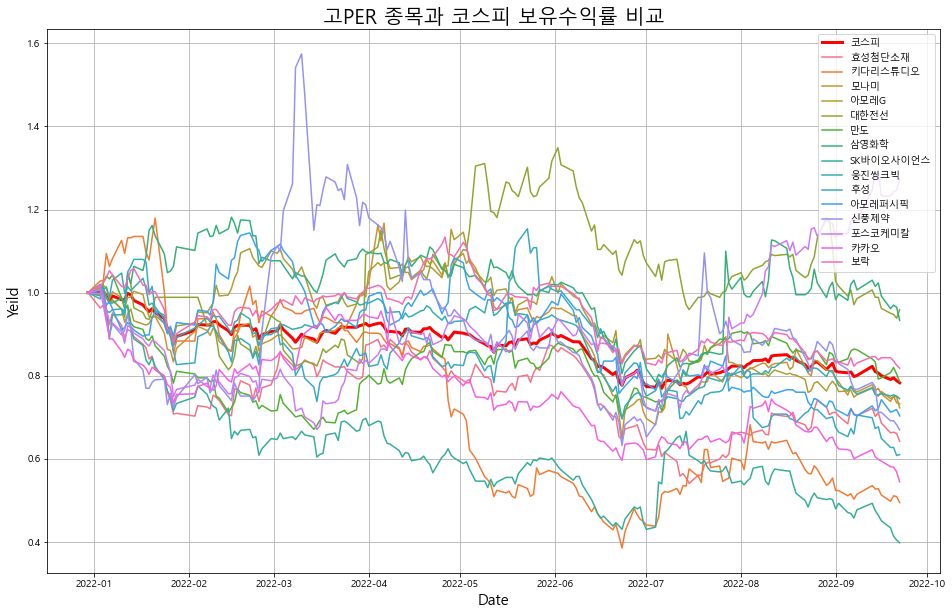

In [13]:
# Visualization
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=kospi_yeild,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=highper_yeild,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'best')
plt.ylabel('Yeild', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('고PER 종목과 코스피 보유수익률 비교', fontsize=20)
plt.show()

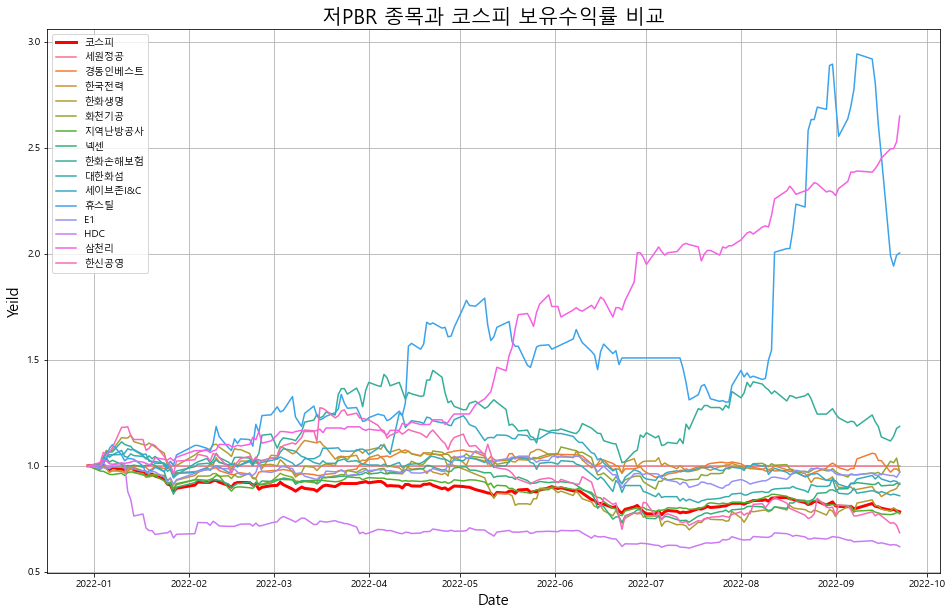

In [14]:
# Visualization
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=kospi_yeild,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=lowpbr_yeild,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'best')
plt.ylabel('Yeild', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('저PBR 종목과 코스피 보유수익률 비교', fontsize=20)
plt.show()

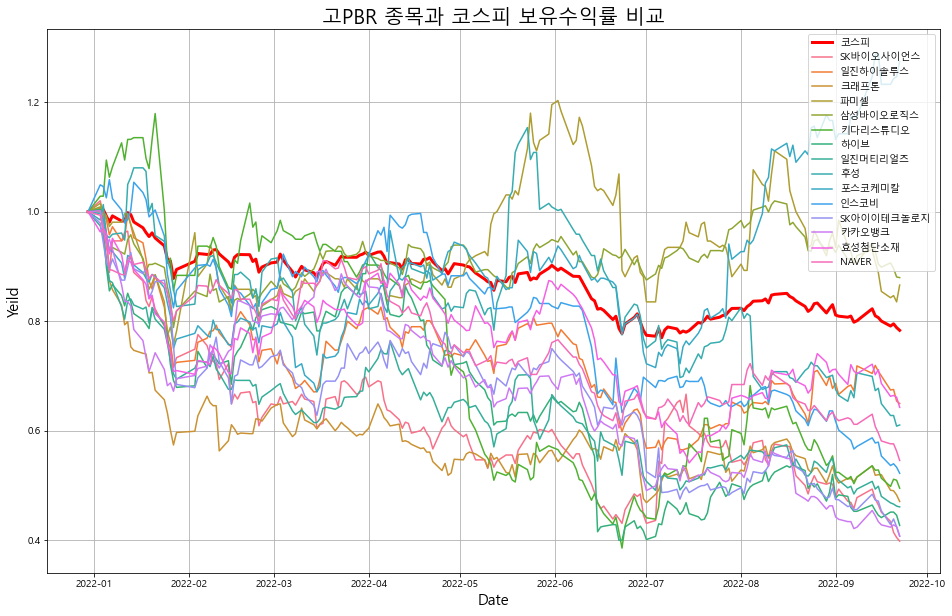

In [15]:
# Visualization
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글깨짐 방지
fig = plt.figure( figsize=(16, 10)) # 그래프 크기 조절

ax1 = sns.lineplot(
    data=kospi_yeild,
    x = 'Date',
    y = 'Close',
    label = '코스피',
    color = 'red',
    linewidth = 3
)

ax2 = sns.lineplot(
    data=highpbr_yeild,
    x = 'Date',
    y = 'Close',
    hue = '종목명'
)

plt.legend(loc = 'best')
plt.ylabel('Yeild', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.grid()

plt.title('고PBR 종목과 코스피 보유수익률 비교', fontsize=20)
plt.show()